# The Divergence in the School of Athens  (A NLP Project)


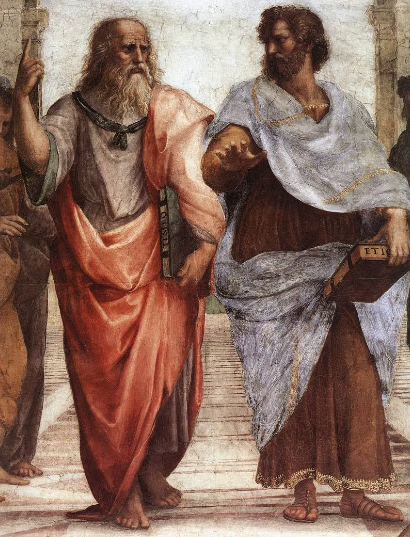

   One of the most famous frescoes in the entire world is the School of Athens. It is a Renaissance masterpiece created by Raphael between 1509 and 1511 and features the famous philosophers of the classical age. Even though there is a lot to discuss in this fresco, I want to draw your attention to the two main figures (picture above) : Plato pointing to the skies and his student Aristotle pointing in the earthward direction.
   One of the most famous frescoes in the entire world is the School of Athens. It is a Renaissance masterpiece created by Raphael between 1509 and 1511 and features the famous philosophers of the classical age. Even though there is a lot to discuss in this fresco, I want to draw your attention to the two main figures (picture above) : Plato pointing to the skies and his student Aristotle pointing in the earthward direction.
	
   Why did Raphael depict them like this? According to Plato, the real world—the one made of material things—is but a shadow of the ideal one. An imperfect mirror of the ideal apple, for instance, can be seen in the imperfect apple that exists in the real world. Plato calls these perfect or ideal things their Forms, hence his theory of Forms. Theory of Forms is not limited to objects, we can also talk about the Form of education, the Form of friendship and so on. Contrary to his teacher, Aristotle asserts that the material world is real. He thinks that the Form is located in the physical world, inside the object in question. There cannot be an apple without applehood.
    
   You may now be able to understand what Raphael was trying to express. Plato gestures to the skies because he thought the Forms existed in another realm, while Aristotle points to the earth because he thought Forms existed in the real world.
    
   The main difference between Plato and Aristotle philosophy is that the philosophy of Plato is more theoretical and abstract in nature, whereas the philosophy of Aristotle is more practical and experimental in nature. This analysis is conducted to identify the divergences between these two philosophers through their writings. 

## EDA (Exploratory Data Analysis)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import warnings
from nrclex import NRCLex
warnings.filterwarnings('ignore')
#document processing
from csv import DictReader, reader
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv("../data/philosophy_data.csv")
author = ['Plato', 'Aristotle']
data_filtered = data[data["author"].isin(author)]
data_filtered.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

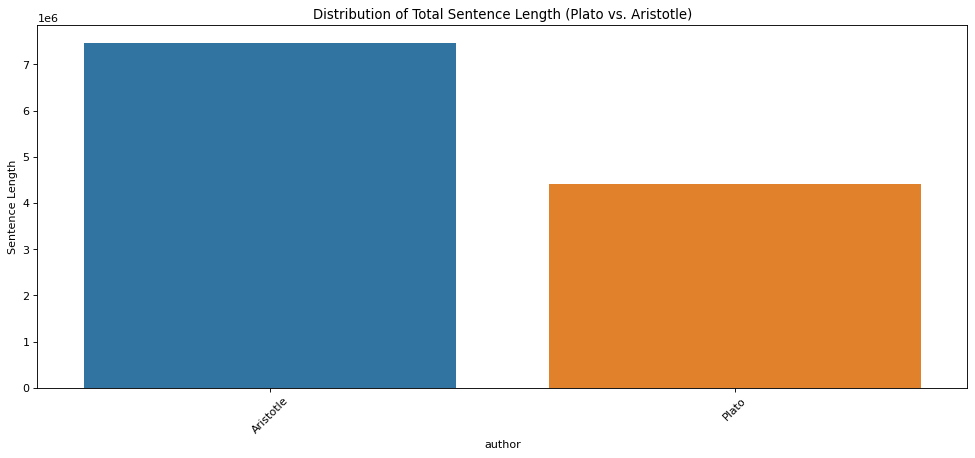

In [3]:
author_length = data_filtered.groupby("author").sum("sentence_length").sort_values(by=['sentence_length'], ascending = False)
author_length["author"] = list(author_length.index)
figure(figsize=(15, 6), dpi=80)
sns.barplot(data = author_length, x = "author", y = "sentence_length")
plt.xticks(rotation=45)
plt.ylabel("Sentence Length")
plt.title("Distribution of Total Sentence Length (Plato vs. Aristotle)")
plt.show()

From the distribution of total sentence length, we can see that Aristotle has more length compared to Plato. From his works, it is said that Aristotle tends to challenge what his teacher has said, so it is common for him to have more sentences.

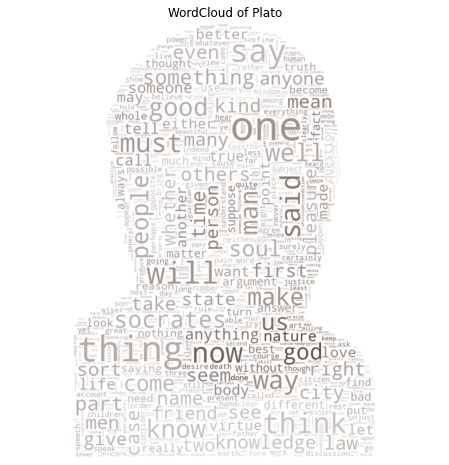

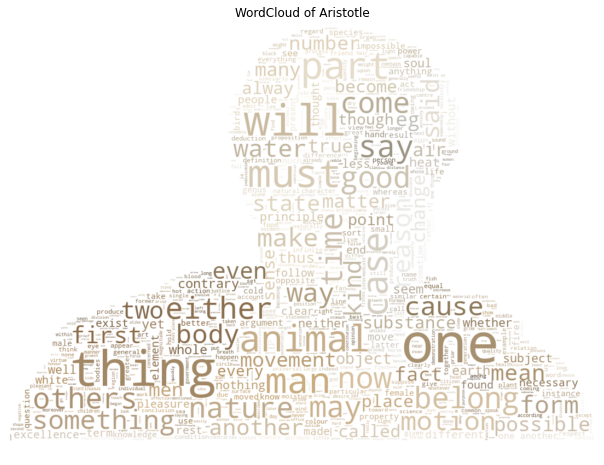

In [4]:
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
df = data_filtered
authors=["Plato", "Aristotle"]
image =["Plato.png", "aristotle.png"]
c=0
for auth in authors:
    df1 = df[df.author==auth]
    text = " ".join(txt for txt in df1.sentence_lowered)
    imag = "../data/"+image[c]
    custom_mask = np.array(Image.open(imag))
    c=c+1
    wordcloud = WordCloud(max_font_size=100, max_words=1000,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
    image_colors = ImageColorGenerator(custom_mask)     
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    str1="../figs/wordcloud-"+image[c-1]
    str2= "WordCloud of "+auth
    plt.title(str2)
    plt.savefig(str1)
    #plt.close()
    plt.show()

What words did Aristotle and Plato use most often in their respective works? <br>
Aristotle is a realist, so his words are more science and object focused ("animal, body, substance, movement) while Plato is an idealist, his words are more related to wisdom ("virtue", "god", "think","knowledge")

## Sentiment Analysis

I use the sentiment analysis to determine the emotion for each of their works, but mainly to identify Aristotle's emotion towards Plato and prove how much he mentions his teacher in his works. 

In [5]:

#NRCLex will measure emotional affect from a body of text
import time
start_time = time.time()
senti_list = []
for i in range(len(df.sentence_lowered)):
    senti_list.append(NRCLex(df.sentence_lowered[i]))

In [6]:
#Detailing of emotions generated by NRClex
senti_detail = [senti_list[i].affect_frequencies for i in range(len(senti_list))]
fear = [senti_detail[i]["fear"] for i in range(len(senti_detail))]
anger = [senti_detail[i]["anger"] for i in range(len(senti_detail))]
anticip = [senti_detail[i]["anticip"] for i in range(len(senti_detail))]
trust = [senti_detail[i]["trust"] for i in range(len(senti_detail))]
surprise = [senti_detail[i]["surprise"] for i in range(len(senti_detail))]
positive = [senti_detail[i]["positive"] for i in range(len(senti_detail))]
negative = [senti_detail[i]["negative"] for i in range(len(senti_detail))]
sadness = [senti_detail[i]["sadness"] for i in range(len(senti_detail))]
disgust = [senti_detail[i]["disgust"] for i in range(len(senti_detail))]
joy = [senti_detail[i]["joy"] for i in range(len(senti_detail))]

In [7]:
df["fear"] = fear
df["anger"] = anger
df["anticip"] = anticip
df["trust"] = trust
df["surprise"] = surprise
df["positive"] = positive
df["negative"] = negative
df["sadness"] = sadness
df["disgust"] = disgust
df["joy"] = joy

In [8]:
df.head(5)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  ...  fear  anger  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...  ...  0.10    0.1   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...  ...  0.00    0.0   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...  ...  0.25    0.0   
3               ['what', 'is', 'this', 'you', 'say']  ...  0.00    0.0   
4  ['someone', 'must', 'have', 'indicted', 'you',...  ...  0.00    0.0   

   anticip  trust  surprise  positive  negative  sadness  disgust  joy  
0      0.0    0.1       0.1       0.2       0.1      0.1     0.00  0.0  
1      0.0    0.0       0.0       1.0       0.0      0.0     0.00  0.0  
2      0.0    0.0       0.0       0.0       0.5      0.0     0.25  0.0  
3      0.0    0.0       0.0       0.0       0.0      0.0     0.00  0.0  
4      0.0    0.0       0.0       0.0       0.0      0.0     0.00  0.0  

[5 rows x 21 columns]

In [9]:
#Group by the sentences by their school (Plato and Aristotle)
school_list = list(df.school.value_counts().index)
senti_types = ["fear","anger","anticip","trust","surprise","sadness","disgust","joy"]
school_group = df.groupby("school").mean(senti_types)

We want to know how many times Aristotle mentions his teacher Plato throughout his writings and whether that sentence has a positive sentiment or not. 

In [10]:
count_lists = []
sentiment_lists = []
for school_1 in school_list:
    count_list = []
    sentiment_list = []
    school_1_data = df[df.school == school_1].reset_index()
    for school_2 in school_list:
        count = 0
        positive = 0
        for i in range(school_1_data.shape[0]):
            if (school_1_data.sentence_lowered[i].find(school_2) != -1):
                count += 1
                if school_1_data.positive[i] > school_1_data.negative[i]:
                    positive += school_1_data.positive[i]
                elif school_1_data.positive[i] == school_1_data.negative[i]:
                    positive += 0
                else:
                    positive -= school_1_data.negative[i]
        count_list.append(count)
        sentiment_list.append(positive)
    count_lists.append(count_list)
    sentiment_lists.append(sentiment_list)

In [11]:
mention_df = pd.DataFrame(count_lists)
mention_df.columns = school_list
mention_df.index = school_list
mention_df['sum'] = mention_df.apply(sum, axis = 1)
mention_df.loc['sum',:] = mention_df.apply(sum, axis = 0)
mention_df

aristotle  plato    sum
aristotle        0.0   74.0   74.0
plato            0.0   30.0   30.0
sum              0.0  104.0  104.0

Turns out, Aristotle really did mention Plato a lot by 74 times throughout his works. 

<AxesSubplot:>

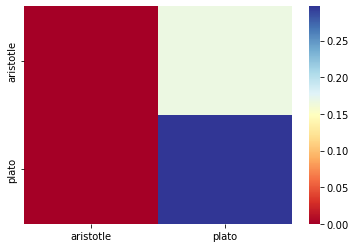

In [12]:
positive_df = pd.DataFrame(sentiment_lists)
positive_df.columns = school_list 
positive_df.index = school_list 
for i in range(positive_df.shape[0]):
    for j in range(positive_df.shape[1]):
        if mention_df.iloc[i,j] >= 10:
            positive_df.iloc[i,j] = positive_df.iloc[i,j]/mention_df.iloc[i,j]
        else:
            positive_df.iloc[i,j] = 0
sns.heatmap(positive_df, cmap="RdYlBu")

From the heatmap above, we can see that Aristotle's positive sentiment toward's plato is only ~0.15, we can conclude that when mentioning his teacher, Aristotle sentences tend to be negative. 

Emotion Analysis PieChart - Plato.jpg  added to the /figs folder!


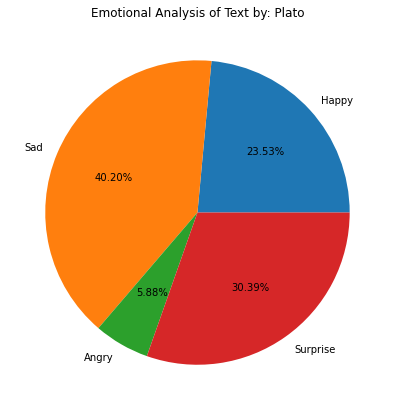

Emotion Analysis PieChart - Aristotle.jpg  added to the /figs folder!


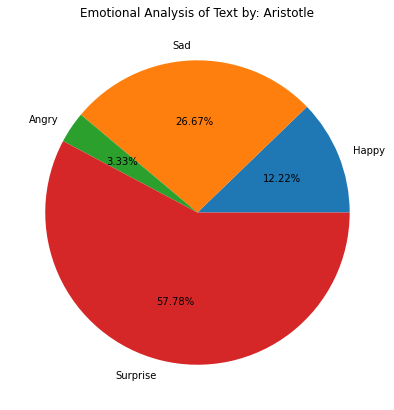

In [17]:
import text2emotion as te
def detect_emotion(sentence):
    ar=te.get_emotion(sentence)
    return ar
authors=['Plato', 'Aristotle']
for auth in authors:
    df1 = df[df['author'] == auth] 
    numHappy = 0
    numSad = 0
    numAngry = 0
    numSurprise = 0
    for x in range(200):
        emotion = detect_emotion(df1['sentence_lowered'].iloc[x])
        if(emotion['Happy']>0.4):
            numHappy = numHappy + 1
        elif (emotion['Sad']>0.4):
            numSad = numSad + 1
        elif(emotion['Angry']>0.4):
            numAngry = numAngry + 1 
        elif (emotion['Surprise']>0.4):
            numSurprise = numSurprise + 1
    plt.figure(figsize = (7, 7))
    plt.pie([numHappy, numSad, numAngry, numSurprise], labels = ['Happy', 'Sad', 'Angry', 'Surprise'], autopct='%1.2f%%')
    s='Emotional Analysis of Text by: '+auth
    plt.title(s)
    s2 = "Emotion Analysis PieChart - " + auth +".jpg"
    str1 = "../figs/"+ s2
    plt.savefig(str1)
    print(s2, " added to the /figs folder!")
    plt.show()


The emotional analysis shows a little personality about Plato and Aristotle, we can see that Plato is a melancholic philosopher most of his works show a Sad emotion by 40.20%, on the contrary Aristotle's writings are more incline to Surprise emotion by 57.78%.

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/denisesonia/nltk_data...


True

Sentiment Analysis of School- Plato .jpg added to the /figs folder!


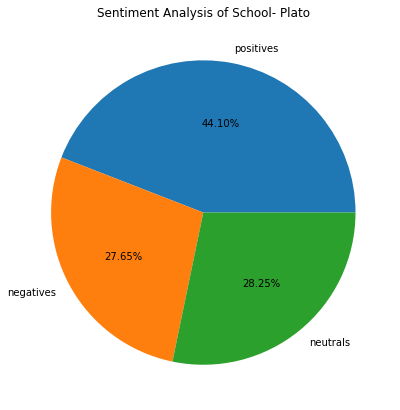

Sentiment Analysis of School- Aristotle .jpg added to the /figs folder!


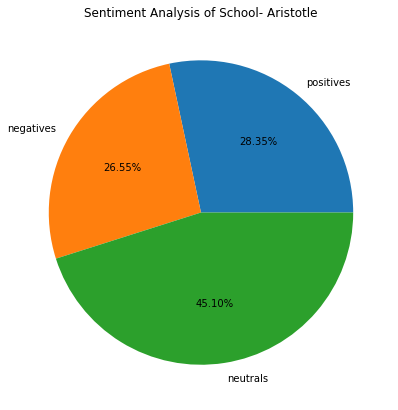

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def Sentiment_Analysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentiment = sentAnalyzer.polarity_scores(sentence)
    if sentiment['compound'] >= 0.05:
        return "positive"
    elif sentiment['compound'] <= -0.05 :
        return "negative"
    else:
        return "neutral"

authors=['Plato', 'Aristotle']
    
for auth in authors :
    df1 = df[df['author'] == auth] 
    post = 0
    negat = 0
    neut = 0
    for i in range (2000):
        sentiment = (Sentiment_Analysis(df1['sentence_lowered'].iloc[i]))
        if sentiment == "positive":
            post += 1
        elif sentiment == "negative":
            negat += 1
        else:
            neut += 1
    plt.figure(figsize = (7, 7))
    plt.pie([post, negat, neut], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
    s='Sentiment Analysis of School- '+auth
    plt.title(s)
    s1="../figs/"+s+".jpg"
    plt.savefig(s1)
    print(s, ".jpg added to the /figs folder!")
    plt.show()

Looking at the sentiment (tendencies of text) from both Aristotle and Plato, Plato has more positive sentiment sentences rather than Aristotle who is more on the Neutral side. A realist is essentially more objective and logical, so this explains why Aristotle has more neutral sentiments because his view are more logical and not sentimental, on the contrary Plato being an idealist that he is, his writings tend to be more sentimental. 

## Topic Modelling 

In [25]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [26]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['sentence_str']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [27]:
df['tokens'] = tokens
df['tokens']

0        [new, socrates, leave, usual, haunt, lyceum, s...
1                                [prosecute, king, archon]
2          [athenians, prosecution, indictment, euthyphro]
3                                                       []
4                               [indict, go, tell, indict]
                               ...                        
87140    [great, advantage, concentrated, effect, pleas...
87141    [consider, oedipus, sophocles, instance, effec...
87142    [unity, imitation, epic, poet, prove, fact, wo...
87143    [say, unity, epic, mean, epic, plurality, acti...
87144    [tragedy, superior, respect, poetic, effect, f...
Name: tokens, Length: 87145, dtype: object

In [105]:
author = ['Plato']
df_plato = df[df["author"].isin(author)]
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df_plato['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df_plato['tokens']]

In [26]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

### Topic Visualization (Plato) 

Using the LDA method, we can uncover the hidden topics in the document. As for Plato, his topics are more related to the human's wisdom. We could find words like "think" "speak" "see" "humanity" "people" which aligns with his philosophy that is abstract and utopian.

In [27]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-

In [134]:
author = ['Aristotle']
df_aristotle = df[df["author"].isin(author)]
dictionary_2 = Dictionary(df_aristotle['tokens'])
dictionary_2.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary_2.doc2bow(doc) for doc in df_aristotle['tokens']]

In [31]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary_2, iterations=50, num_topics=10, workers = 4, passes=10)

### Topic Visualization (Aristotle) 

On the contrary, Aristotle's topics are more related to the world (objective things). We could find words like "animal" "nature" "water" "movement" which aligns with his philosophy that are empirical, practical, and commonsensical.

In [33]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary_2)
pyLDAvis.display(lda_display)

/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/denisesonia/opt/anaconda3/lib/python3.9/site-

## Readability Index using Flesch Formula 

Readability is the ease with which a reader can understand a written text. In natural language, the readability of text depends on its content (the complexity of its vocabulary and syntax)

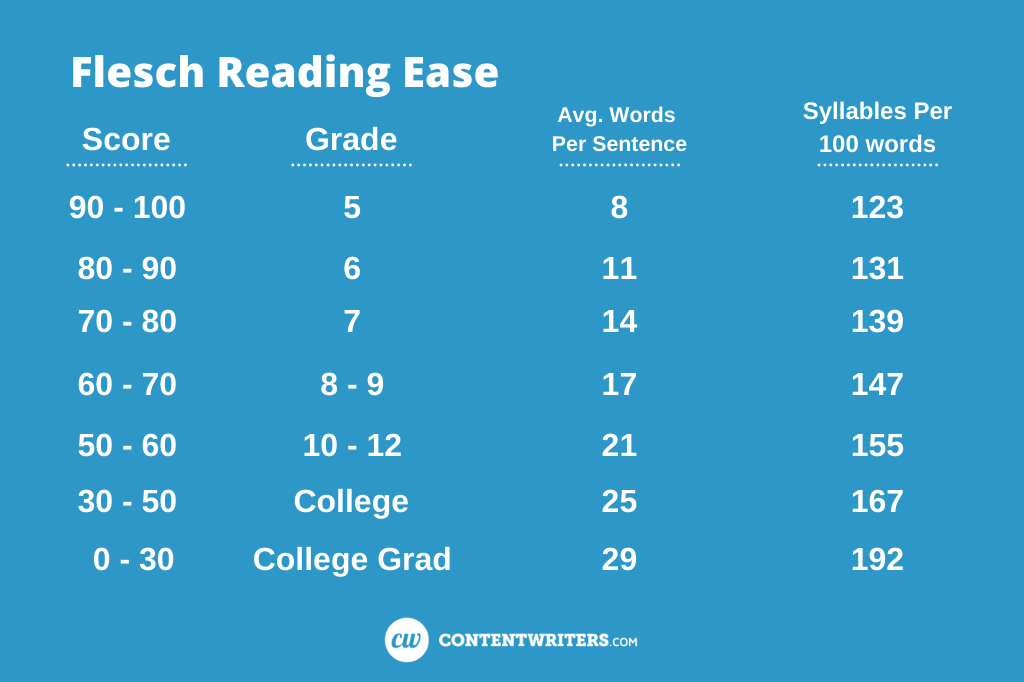

The data that is being used to analyze the Flesch readibility score will be derived from the dataset. About 20-30 sentences from the writings.

### Flesch Formula for Plato  

In [133]:
import textstat
from textatistic import Textatistic

text = """What's new, Socrates, to make you leave your usual haunts in the Lyceum and spend your time here by the king archon's court?",
 'Surely you are not prosecuting anyone before the king archon as I am?',
 'The Athenians do not call this a prosecution but an indictment, Euthyphro.',
 'What is this you say?',
 'Someone must have indicted you, for you are not going to tell me that you have indicted someone else.',
 'But someone else has indicted you?',
 'I do not really know him myself, Euthyphro.',
 'He is apparently young and unknown.',
 'They call him Meletus, I believe.',
 'He belongs to the Pitthean deme, if you know anyone from that deme called Meletus, with long hair, not much of a beard, and a rather aquiline nose.',
 "I don't know him, Socrates.",
 'What charge does he bring against you?',
 'A not ignoble one I think',
 ', for it is no small thing for a young man to have knowledge of such an important subject.',
 'He says he knows how our young men are corrupted and who corrupts them.',
 'He is likely to be wise, and when he sees my ignorance corrupting his contemporaries, he proceeds to accuse me to the city as to their mother.',
 'I think he is the only one of our public men to start out the right way, for it is right to care first that the young should be as good as possible, just as a good farmer is likely to take care of the young plants first, and of the others later.',
 'So, too, Meletus first gets rid of us who corrupt the young shoots, as he says, and then afterwards he will obviously take care of the older ones and become a source of great blessings for the city, as seems likely to happen to one who started out this way.',
 'I could wish this were true, Socrates, but I fear the opposite may happen.',
 'He seems to me to start out by harming the very heart of Euthyphro the city by attempting to wrong you.',
 'Tell me, what does he say you do to corrupt the young?',
 'Strange things, to hear him tell it, for he says that I am a maker of gods, and on the ground that I create new gods while not believing in the old gods, he has indicted me for their sake, as he puts it.',
 'I understand, Socrates.',
 'This is because you say that the divine sign keeps coming to you.',
 'So he has written this indictment against you as one who makes innovations in religious matters, and he comes to court to slander you, knowing that such things are easily misrepresented to the crowd.',
 'The same is true in my case.',
 'Whenever I speak of divine matters in the assembly and foretell the future, they laugh me down as if I were crazy; and yet I have foretold nothing that did not happen.',
 'Nevertheless, they envy all of us who do this.',
 'One need not worry about them, but meet them head on.',
 'My dear Euthyphro, to be laughed at does not matter perhaps, for the Athenians do not mind anyone they think clever, as long as he does not teach his own wisdom, but if they think that he makes others to be like himself',
 'they get angry, whether through envy, as you say, or for some other reason.',
 'I have certainly no desire to test their feelings towards me in this matter.',
 "Perhaps you seem to make yourself but rarely available, and not be willing to teach your own wisdom, but I'm afraid that my liking for people makes them think that I pour out to anybody anything I have to say, not only without charging a fee but even glad to reward anyone who is willing to listen.",
 'If then they were intending to laugh at me, as you say they laugh at you, there would be nothing unpleasant in their spending their time in court laughing and jesting, but if they are going to be serious, the outcome is not clear except to you prophets.',
 'Perhaps it will come to nothing, Socrates, and you will fight your case as you think best, as I think I will mine.',
 'What is your case, Euthyphro?',
 'Are you the defendant or the prosecutor?',
 'Whom do you prosecute?',
 'One whom I am thought crazy to prosecute.',
 'Are you pursuing someone who will easily escape you?',
 'Far from it, for he is quite old.',
 'What is the case about?',
 'Certainly, Euthyphro, most men would not know how they could do this and be right.',
 'It is not the part of anyone to do this, but of one who is far advanced in wisdom.',
 'Yes, by Zeus, Socrates, that is so.',
 'Is then the man your father killed one of your relatives?',
 'Or is that obvious, for you would not prosecute your father for the murder of a stranger.',
 'It is ridiculous, Socrates, for you to think that it makes any difference whether the victim is a stranger or a relative.',
 'One should only watch whether the killer acted justly or not; if he acted justly, let him go, but if not, one should prosecute, if, that is to say, the killer shares your hearth and table.',
 'The pollution is the same if you knowingly keep company with such a man and do not cleanse yourself and him by bringing him to justice.',
 'The victim was a dependent of mine, and when we were farming in Naxos he was a servant of ours.',
 'He killed one of our household slaves in drunken anger, so my father bound him hand and foot and threw him in a ditch, then sent a man here to inquire from the priest what should be done.',
 'During that time he gave no thought or care to the bound man, as being a killer, and it was no matter if he died, which he did.',
 'Hunger and cold and his bonds caused his death before the messenger came back from the seer.',
 "Both my father and my other relatives are angry that I am prosecuting my father for murder on behalf of a murderer when he hadn't even killed him, they say, and even if he had, the dead man does not deserve a thought, since he was a killer.","""



# Compute the readability scores
readability_scores = textstat.flesch_reading_ease(text)

# Print the flesch reading ease score
print('The Flesch Reading Ease is %.2f' % (readability_scores))

The Flesch Reading Ease is 76.66


### Flesch Formula for Aristotle

In [139]:
import textstat
from textatistic import Textatistic

text = """ ' When things have only a name in common and the definition of being which corresponds to the name is different, they are called homonymous.',
 'Thus, for example, both a man and a picture are animals.',
 'These have only a name in common and the definition of being which corresponds to the name is different; for if one is to say what being an animal is for each of them, one will give two distinct definitions.',
 'When things have the name in common and the definition of being which corresponds to the name is the same, they are called synonymous.',
 'Thus, for example, both a man and an ox are animals.',
 'Each of these is called, by a common name, an animal, and the definition of being is also the same; for if one is to give the definition of each what being an animal is for each of them',
 'one will give the same definition.',
 'When things get their name from something, with a difference of ending, they are called paronymous.',
 'Thus, for example, the grammarian gets his name from grammar, the brave get theirs from bravery.',
 'Of things that are said, some involve combination while others are said without combination.',
 'Examples of those involving combination are: man runs, man wins; and of those without combination:',
 'man, ox, runs, wins.',
 'Of things there are: (a)',
 'some are said of a subject but are not in any subject.',
 'For example, man is said of a subject, the individual man, but is not in any subject.',
 '(b) Some are in a subject but are not said of any subject.',
 "(By 'in a subject' I mean what is in something, not as a part, and cannot exist separately from what it is in.",
 'Minio Paluello, Oxford, nd ed.',
 'For example, the individual knowledge of grammar is in a subject, the soul, but is not said of any subject; and the individual white is in a subject, the body (for all colour is in a body), but is not said of any subject.',
 'Some are both said of a subject and in a subject.',
 'For example, knowledge is in a subject, the soul, and is also said of a subject, knowledge of grammar.',
 'Some are neither in a subject nor said of a subject, for example, the individual man or the individual horse for nothing of this sort is either in a subject or said of a subject.',
 'Things that are individual and numerically one are, without exception, not said of any subject, but there is nothing to prevent some of them from being in a subject the individual knowledge of grammar is one of the things in a subject.',
 'Whenever one thing is predicated of another as of a subject, all things said of what is predicated will be said of the subject also.',
 'For example, man is predicated of the individual man, and animal of man; so animal will be predicated of the individual man also for the individual man is both a man and an animal.',
 'The differentiae of genera which are differe and not subordinate one to the other are themselves different in kind.',
 'For example, animal and knowledge: footed, winged, aquatic, two footed, are differentiae of animal, but none of these is a differentia of knowledge; one sort of knowledge does not differ from another by being two footed.',
 'However, there is nothing to prevent genera subordinate one to the other from having the same differentiae.',
 'For the higher are predicated of the genera below them, so that all differentiae of the predicated genus will be differentiae of the subject also.',
 'Of things said without any combination, each signifies either substance or quantity or qualification or a relative or where or when or being in a position or having or doing or being affected.',
 'To give a rough idea, examples of substance are man, horse; of quantity: four foot, five foot; of qualification: white, grammatical; of a relative: double, half, larger; of where: in the Lyceum, in the market place; of when: yesterday, last year; of being in a position: is lying, is sitting; of having: has shoes on, has armour on; of doing: cutting, burning; of being affected: being cut, being burned.',
 'None of the above is said just by itself in any affirmation, but by the combination of these with one another an affirmation is produced.',
 'For every affirmation, it seems, is either true or false; but of things said without any combination none is either true or false (',
 'e.g. man, white, runs, wins).',
 'Read ton eteron genon.',
 'A substance that which is called a substance most strictly, primarily, and most of all is that which is neither said of a subject nor in a subject, eg the individual man or the individual horse.',
 'The species in which the things primarily called substances are, are called secondary substances, as also are the genera of these species.',
 'For example, the individual man belongs in a species, man, and animal is a genus of the species; so these both man and animal are called secondary substances.',
 'It is clear from what has been said that if something is said of a subject both its name and its definition are necessarily predicated of the subject.',
 'For example, man is said of a subject, the individual man, and the name is of course predicated (since you will be predicating man of the individual man), and also the definition of man will be predicated of the individual man (since the individual man is also a man).',
 'Thus both the name and the definition will be predicated of the subject.',
 'But as for things which are in a subject, in most cases neither the name nor the definition is predicated of the subject.',
 'In some cases there is nothing to prevent the name from being predicated of the subject, but it is impossible for the definition to be predicated.',
 'For example, white, which is in a subject (the body), is predicated of the subject; for a body is called white.',
 'But the definition of white will never be predicated of the body.',
 'All the other things are either said of the primary substances as subjects or in them as subjects.',
 'This is clear from an examination of cases.',
 'For example, animal is predicated of man and therefore also of the individual man; for were it predicated of none of the individual men it would not be predicated of man at all.',
 'Again, colour is in body and therefore also in an individual body; for were it not in some individual body it would not be in body at all.',
 'Thus all the other things are either said of the primary substances as subjects or in them as subjects.',
 'So if the primary substances did not exist it would be impossible for any of the other things to exist.',
 'Of the secondary substances the species is more a substance than the genus, since it is nearer to the primary substance.',
 'For if one is to say of the primary substance what it is, it will be more informative and apt to give the species than the genus.',
 "For example, it would be more informative to say of the individual man that he is a man than that he is an animal (since the one is more distinctive of the individual man while the other is more general); and more informative to say of The Oxford text continues: 'For all the other things are either said of these as subjects or in them as subjects; so that if the primary substances did not exist, it would be impossible for any of the other things to exist.'",
 'Most scholars excise those sentences.',
 'the individual tree that it is a tree than that it is a plant.',
 'Further, it is because the primary substances are subjects for all the other things and all the other things are predicated of them or are in them, that they are called substances most of all.',
 'But as the primary substances stand to the other things, so the species stands to the genus: the species is a subject for the genus (for the genera are predicated of the species but the species are not predicated reciprocally of the genera).',
 'Hence for this reason too the species is more a substance than the genus.',
 'But of the species themselves those which are not genera one is no more a substance than another: it is no more apt to say of the individual man that he is a man than to say of the individual horse that it is a horse.',
 'And similarly of the primary substances one is no more a substance than another: the individual man is no more a substance than the individual ox.',
 'It is reasonable that, after the primary substances, their species and genera should be the only other things called secondary substances.',
 'For only they, of things predicated, reveal the primary substance.',
 'For if one is to say of the individual man what he is, it will be in place to give the species or the genus (though more informative to give man than animal); but to give any of the other things would be out of place for example, to say white or runs or anything like that.',
 'So it is reasonable that these should be the only other things called substances.',
 'Further, it is because the primary substances are subjects for everything else that they are called substances most strictly.',
 'But as the primary substances stand to everything else, so the species and genera of the primary substances stand to all the rest: all the rest are predicated of these.',
 'For if you will call the individual man grammatical, then you will call both a man and an animal grammatical; and similarly in other cases.',
 'It is a characteristic common to every substance not to be in a subject.',
 'For a primary substance is neither said of a subject nor in a subject.',
 'And as for secondary substances, it is obvious at once that they are not in a subject.',
 'For man is said of the individual man as subject but is not in a subject: man is not in the individual man.',
 'Similarly, animal also is said of the individual man as subject, but animal is not in the individual man.',
 'Further, while there is nothing to prevent the name of what is in a subject from being sometimes predicated of the subject, it is impossible for the definition to be predicated.',
 'But the definition of the secondary substances, as well as the name, is predicated of the subject: you will predicate the definition of man of the individual man, and also that of animal.',
 'No substance, therefore, is in a subject.',
 'This is not, however, peculiar to substance, since the differentia also is not in a subject.',
 'For footed and two footed are said of man as subject but are not in a subject; neither two footed nor footed is in man.',
 'Moreover, the definition of the differentia is predicated of that of which the differentia is said.',
 'For example, if footed is said of man the definition of footed will also be predicated of man; for man is footed.',
 'We need not be disturbed by any fear that we may be forced to say that the parts of a substance, being in a subject (the whole substance), are not substances.',
 'For when we spoke of things in a subject we did not mean things belonging in something as parts.',
 'It is a characteristic of substances and differentiae that all things called from them are so called synonymously.',
 'For all the predicates from them are predicated either of the individuals or of the species.',
 '(For from a primary substance there is no predicate, since it is said of no subject; and as for secondary substances, the species is predicated of the individual, the genus both of the species and of the individual.',
 'Similarly, differentiae too are predicated both of the species and of the individuals.)',
 'And the primary substances admit the definition of the species and of the genera, and the species admits that of the genus; for everything said of what is predicated will be said of the subject also.',
 'Similarly, both the species and the individuals admit the definition of the differentiae.',
 'But synonymous things were precisely those with both the name in common and the same definition.',
 'Hence all the things called from substances and differentiae are so called synonymously.',
 "Every substance seems to signify a certain 'this'.",
 "As regards the primary substances, it is indisputably true that each of them signifies a certain 'this'; for the thing revealed is individual and numerically one.",
 "But as regards the secondary substances, though it appears from the form of the name when one speaks of man or animal that a secondary substance likewise signifies a certain 'this', this is not really true; rather, it signifies a certain qualification for the subject is not, as the primary substance is, one, but man and animal are said of many things.",
 'However, it does not signify simply a certain qualification, as white does.',
 'White signifies nothing but a qualification, whereas the species and the genus mark off the qualification of substance they signify substance of a certain qualification.',
 '(One draws a wider boundary with the genus than with the species, for in speaking of animal one takes in more than in speaking of man.)',
 'Another characteristic of substances is that there is nothing contrary to them.',
 'For what would be contrary to a primary substance?',
 'For example, there is nothing contrary to an individual man, nor yet is there anything contrary to man or to animal.',
 'This, however, is not peculiar to substance but holds of many other things also, for example, of quantity.',
 'For there is nothing contrary to four foot or to ten or to anything of this kind unless someone were to say that many is contrary to few or large to small; but still there is nothing contrary to any definite quantity.',
 'Substance, it seems, does not admit of a more and a less.',
 'I do not mean that one substance is not more a substance than another',
 '(we have said that it is), but that any given substance is not called more, or less, that which it is.',
 'For example, if this substance is a man, it will not be more a man or less a man either than itself or than another man.',
 'For one man is not more a man than another, as one pale thing is more pale than another and one beautiful thing more beautiful than another.',
 'Again, a thing is called more, or less, such and such than itself; for example, the body that is pale is called more pale now than before, and the one that is hot is called more, or less, hot.',
 'Substance, however, is not spoken of thus.',
 'For a man is not called more a man now than before, nor is anything else that is a substance.',
 'Thus substance does not admit of a more and a less.',
 'It seems most distinctive of substance that what is numerically one and the same is able to receive contraries.',
 'In no other case could one bring forward anything, numerically one, which is able to receive contraries.',
 'For example, a colour which is numerically one and the same will not be black and white, nor will numerically one and',
 'the same action be bad and good; and similarly with everything else that is not substance.',
 'A substance, however, numerically one and the same, is able to receive contraries.',
 'For example, an individual man one and the same becomes pale at one time and dark at another, and hot and cold, and bad and good.',
 'Nothing like this is to be seen in any other case, unless perhaps someone might object and say that statements and beliefs are like this.',
 'For the same statement seems to be both true and false.',
 'Suppose, for example, that the statement that somebody is sitting is true; after he has got up this same statement will be false.',
 'Suppose you believe truly that somebody is sitting; after he has got up you will believe falsely if you hold the same belief about him.',
 'However, even if we were to grant this, there is still a difference in the way contraries are received.',
 'For in the case of substances it is by themselves changing that they are able to receive contraries.',
 'For what has become cold instead of hot, or dark instead of pale, or good instead of bad, has changed (has altered); similarly in other cases too it is by itself undergoing change that each thing is able to receive contraries.',
 'Statements and beliefs, on the other hand, themselves remain completely unchangeable in every way; it is because the actual thing changes that the contrary comes to belong to them.',
 'For the statement that somebody is sitting remains the same; it is because of a change in the actual thing that it comes to be true at one time and false at another.',
 'Hence at least the way in which it is able to receive contraries through a change in itself would be distinctive of substance, even if we were to grant that beliefs and statements are able to receive contraries.',
 'For it is not because they themselves receive anything that statements and beliefs are said to be able to receive contraries, but because of what has happened to something else.',
 'For it is because the actual thing exists or does not exist that the statement is said to be true or false, not because it is able itself to receive contraries.',
 'No statement, in fact, or belief is changed at all by anything.',
 'So, since nothing happens in them, they are not able to receive contraries.',
 'A substance, on the other hand, is said to be able to receive contraries because it itself receives contraries.',
 'For it receives sickness and health, and paleness and darkness; and because it itself receives the various things of this kind',
 'it is said to be able to receive contraries.',
 'It is, therefore, distinctive of substance that what is numerically one and the same is able to receive contraries.',
 'This brings to an end our discussion of substance.',
 'Of quantities some are discrete, others continuous; and some are composed of parts which have position in relation to one another, others are not composed of parts which have position.',
 'Discrete are number and language; continuous are lines, surfaces, bodies, and also, besides these, time and place.',
 'For the parts of a number have no common boundary at which they join together.',
 'For example, if five is a part of ten the two fives do not join together at any common boundary but are separate; nor do the three and the seven join together at any common boundary.',
 'Nor could you ever in the case of a number find a common boundary of its parts, but they are always separate.',
 'Hence number is one of the discrete quantities.',
 'Similarly, language also is one of the discrete quantities (that language is a quantity is evident, since it is measured by long and short syllables; I mean here language that is spoken).',"""


# Compute the readability scores
readability_scores = textstat.flesch_reading_ease(text)

# Print the flesch reading ease score
print('The Flesch Reading Ease is %.2f' % (readability_scores))

The Flesch Reading Ease is 55.88


From the readability score that we generated above, we can see that Plato is has higher Flesch score of 76.66 meaning that his writings can be easily read by Grade 7 students while Aristotle has a relatively lower Flesch score of 55.88 meaning that his writings only can be easily read by Grade 10-12 students.

# Conclusion

From the analysis done above we can conclud that the divergence between Plato Aristotle can be seen through some parts of their writings such as : 
1. <b>The Sentence Length & Readability</b>  : Aristotle has a relatively longer sentences than Plato and Aristotle has a lower readibility than Plato. 
2. <b>Prove that they have different views of the world, hence the two different directions on the Frescoe</b> : From the word cloud and topic modelling we can see that Plato chose words that related to wisdom and humanity, proving him being an idealist. On the contrary Aristotle chose words that is more objective and real proving him being a realist. 
3. <b>Sentiment</b> : From the sentiment analysis above, we can conclude that Plato & Aristotle also have different emotions in their writings, Plato is more melancholic than Aristotle, and has more polar sentiment (positive) rather than neutral like Aristotle. 